<b>THE DES ALGORITHM</b>

In [1]:
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
# https://github.com/RobinDavid/pydes/blob/master/pydes.py
PI = [58, 50, 42, 34, 26, 18, 10, 2,
      60, 52, 44, 36, 28, 20, 12, 4,
      62, 54, 46, 38, 30, 22, 14, 6,
      64, 56, 48, 40, 32, 24, 16, 8,
      57, 49, 41, 33, 25, 17, 9, 1,
      59, 51, 43, 35, 27, 19, 11, 3,
      61, 53, 45, 37, 29, 21, 13, 5,
      63, 55, 47, 39, 31, 23, 15, 7]

#Initial permut made on the key
CP_1 = [57, 49, 41, 33, 25, 17, 9,
        1, 58, 50, 42, 34, 26, 18,
        10, 2, 59, 51, 43, 35, 27,
        19, 11, 3, 60, 52, 44, 36,
        63, 55, 47, 39, 31, 23, 15,
        7, 62, 54, 46, 38, 30, 22,
        14, 6, 61, 53, 45, 37, 29,
        21, 13, 5, 28, 20, 12, 4]

#Permut applied on shifted key to get Ki+1
CP_2 = [14, 17, 11, 24, 1, 5, 3, 28,
        15, 6, 21, 10, 23, 19, 12, 4,
        26, 8, 16, 7, 27, 20, 13, 2,
        41, 52, 31, 37, 47, 55, 30, 40,
        51, 45, 33, 48, 44, 49, 39, 56,
        34, 53, 46, 42, 50, 36, 29, 32]

#Expand matrix to get a 48bits matrix of datas to apply the xor with Ki
E = [32, 1, 2, 3, 4, 5,
     4, 5, 6, 7, 8, 9,
     8, 9, 10, 11, 12, 13,
     12, 13, 14, 15, 16, 17,
     16, 17, 18, 19, 20, 21,
     20, 21, 22, 23, 24, 25,
     24, 25, 26, 27, 28, 29,
     28, 29, 30, 31, 32, 1]

#SBOX
S_BOX = [
         
[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
 [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
 [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
 [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13],
],

[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
 [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
 [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
 [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9],
],

[[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
 [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
 [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
 [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12],
],

[[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
 [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
 [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
 [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14],
],  

[[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
 [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
 [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
 [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3],
], 

[[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
 [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
 [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
 [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13],
], 

[[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
 [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
 [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
 [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12],
],
   
[[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
 [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
 [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
 [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11],
]
]

#Permut made after each SBox substitution for each round
P = [16, 7, 20, 21, 29, 12, 28, 17,
     1, 15, 23, 26, 5, 18, 31, 10,
     2, 8, 24, 14, 32, 27, 3, 9,
     19, 13, 30, 6, 22, 11, 4, 25]

#Final permut for datas after the 16 rounds
PI_1 = [40, 8, 48, 16, 56, 24, 64, 32,
        39, 7, 47, 15, 55, 23, 63, 31,
        38, 6, 46, 14, 54, 22, 62, 30,
        37, 5, 45, 13, 53, 21, 61, 29,
        36, 4, 44, 12, 52, 20, 60, 28,
        35, 3, 43, 11, 51, 19, 59, 27,
        34, 2, 42, 10, 50, 18, 58, 26,
        33, 1, 41, 9, 49, 17, 57, 25]

#Matrix that determine the shift for each round of keys
SHIFT = [1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1]

def string_to_bit_array(text):#Convert a string into a list of bits
    array = list()
    for char in text:
        binval = binvalue(char, 8)#Get the char value on one byte
        array.extend([int(x) for x in list(binval)]) #Add the bits to the final list
    return array

def hamming_distance(a1, a2): # finds the hamming distance between the two bit arrays
    assert len(a1) == len(a2)
    dist = 0
    for i in range(len(a1)):
        if a1[i] != a2[i]:
            dist += 1
    return dist

def string_to_bit_array_as_it_is(text):
    # converts a hexadecimal string into a binary valued array
    bits = list()
    mp = {
        '0': [0, 0, 0, 0],
        '1': [0, 0, 0, 1],
        '2': [0, 0, 1, 0],
        '3': [0, 0, 1, 1],
        '4': [0, 1, 0, 0],
        '5': [0, 1, 0, 1],
        '6': [0, 1, 1, 0],
        '7': [0, 1, 1, 1],
        '8': [1, 0, 0, 0],
        '9': [1, 0, 0, 1],
        'a': [1, 0, 1, 0],
        'b': [1, 0, 1, 1],
        'c': [1, 1, 0, 0],
        'd': [1, 1, 0, 1],
        'e': [1, 1, 1, 0],
        'f': [1, 1, 1, 1]
    }
    for i in range(len(text)):
        bits.extend(mp[text[i]])

    return bits

def bit_array_to_string(array): #Recreate the string from the bit array
    res = ''.join([chr(int(y,2)) for y in [''.join([str(x) for x in _bytes]) for _bytes in  nsplit(array,8)]])   
    return res

def bit_array_to_hex_string(array):
    resp = ''
    for i in range(0, len(array), 4):
        val = array[i] * 2 ** 3 + array[i + 1] * 2 ** 2 + array[i + 2] * 2 ** 1 + array[i + 3]
        if val >= 0 and val <= 9:
            resp += str(val)
        else:
            resp += chr(ord('a') + val - 10)

    return resp

def binvalue(val, bitsize): #Return the binary value as a string of the given size 
    binval = bin(val)[2:] if isinstance(val, int) else bin(ord(val))[2:]
    if len(binval) > bitsize:
        raise "binary value larger than the expected size"
    while len(binval) < bitsize:
        binval = "0"+binval #Add as many 0 as needed to get the wanted size
    return binval

def nsplit(s, n):#Split a list into sublists of size "n"
    return [s[k:k+n] for k in range(0, len(s), n)]

ENCRYPT=1
DECRYPT=0

class des():
    def __init__(self):
        self.password = None
        self.text = None
        self.keys = list()
        self.round_results = [] # contains the hexstring after each round of the algorithm
    
    def clear(self):
        self.round_results = [] # reset the round results to an empty array
        
    def run(self, key, text, action=ENCRYPT, padding=False):
        # if len(key) < 8:
        #     raise "Key Should be 8 bytes long"
        # elif len(key) > 8:
        #     key = key[:8] #If key size is above 8bytes, cut to be 8bytes long
        
        self.password = key
        self.text = text
        
        if padding and action==ENCRYPT:
            self.addPadding()
        elif len(self.text) % 8 != 0:#If not padding specified data size must be multiple of 8 bytes
            raise "Data size should be multiple of 8"
        
        self.generatekeys() #Generate all the keys

        text_blocks = nsplit(self.text, 16) #Split the text in blocks of 8 bytes so 64 bits
 
        result = list()
        for block in text_blocks:#Loop over all the blocks of data
            block = string_to_bit_array_as_it_is(block)#Convert the block in bit array
            block = self.permut(block,PI)#Apply the initial permutation
            g, d = nsplit(block, 32) #g(LEFT), d(RIGHT)
            tmp = None
            self.round_results.append(self.text)
            for i in range(16): #Do the 16 rounds
                d_e = self.expand(d, E) #Expand d to match Ki size (48bits)
                if action == ENCRYPT:
                    tmp = self.xor(self.keys[i], d_e)#If encrypt use Ki
                else:
                    tmp = self.xor(self.keys[15-i], d_e)#If decrypt start by the last key
                tmp = self.substitute(tmp) #Method that will apply the SBOXes
                tmp = self.permut(tmp, P)
                tmp = self.xor(g, tmp)
                g = d
                d = tmp

                self.round_results.append(bit_array_to_hex_string(g) + bit_array_to_hex_string(d))

            result += self.permut(d+g, PI_1) #Do the last permut and append the result to result
        # final_res = bit_array_to_string(result)
        # if padding and action==DECRYPT:
        #     return self.removePadding(final_res) #Remove the padding if decrypt and padding is true
        # else:
        #     return final_res #Return the final string of data ciphered/deciphered
        return bit_array_to_hex_string(result)
    
    def substitute(self, d_e):#Substitute bytes using SBOX
        subblocks = nsplit(d_e, 6)#Split bit array into sublist of 6 bits
        result = list()
        for i in range(len(subblocks)): #For all the sublists
            block = subblocks[i]
            row = int(str(block[0])+str(block[5]),2)#Get the row with the first and last bit
            column = int(''.join([str(x) for x in block[1:][:-1]]),2) #Column is the 2,3,4,5th bits
            val = S_BOX[i][row][column] #Take the value in the SBOX appropriated for the round (i)
            bin = binvalue(val, 4)#Convert the value to binary
            result += [int(x) for x in bin]#And append it to the resulting list
        return result
        
    def permut(self, block, table):#Permut the given block using the given table (so generic method)
        return [block[x-1] for x in table]
    
    def expand(self, block, table):#Do the exact same thing than permut but for more clarity has been renamed
        return [block[x-1] for x in table]
    
    def xor(self, t1, t2):#Apply a xor and return the resulting list
        return [x^y for x,y in zip(t1,t2)]
    
    def generatekeys(self):#Algorithm that generates all the keys
        self.keys = []
        key = string_to_bit_array_as_it_is(self.password)
        key = self.permut(key, CP_1) #Apply the initial permut on the key
        g, d = nsplit(key, 28) #Split it in to (g->LEFT),(d->RIGHT)
        for i in range(16):#Apply the 16 rounds
            g, d = self.shift(g, d, SHIFT[i]) #Apply the shift associated with the round (not always 1)
            tmp = g + d #Merge them
            self.keys.append(self.permut(tmp, CP_2)) #Apply the permut to get the Ki

    def shift(self, g, d, n): #Shift a list of the given value
        return g[n:] + g[:n], d[n:] + d[:n]
    
    def addPadding(self):#Add padding to the datas using PKCS5 spec.
        pad_len = 8 - (len(self.text) % 8)
        self.text += pad_len * chr(pad_len)
    
    def removePadding(self, data):#Remove the padding of the plain text (it assume there is padding)
        pad_len = ord(data[-1])
        return data[:-pad_len]
    
    def encrypt(self, key, text, padding=False):
        return self.run(key, text, ENCRYPT, padding)
    
    def decrypt(self, key, text, padding=False):
        return self.run(key, text, DECRYPT, padding)

<b>Testing the DES algorithm with a book example</b>

In [3]:

'''
    1. The round_results function in the des class is custom made for this assignment
       and it stores all the hex values at the end of each round.
    2. The code has been modified to work on the hex strings instead of simple ASCII 
       strings as was the case originally.
'''

key = "0f1571c947d9e859" # original key
text = "02468aceeca86420" # original plaintext

d = des()
r = d.encrypt(key,text)

for round_no in range(17):
    print("round", round_no, ":", d.round_results[round_no])
    
print("Ciphered: %r" % r)

round 0 : 02468aceeca86420
round 1 : 3cf03c0fbad22845
round 2 : bad2284599e9b723
round 3 : 99e9b7230bae3b9e
round 4 : 0bae3b9e42415649
round 5 : 4241564918b3fa41
round 6 : 18b3fa419616fe23
round 7 : 9616fe2367117cf2
round 8 : 67117cf2c11bfc09
round 9 : c11bfc09887fbc6c
round 10 : 887fbc6c600f7e8b
round 11 : 600f7e8bf596506e
round 12 : f596506e738538b8
round 13 : 738538b8c6a62c4e
round 14 : c6a62c4e56b0bd75
round 15 : 56b0bd7575e8fd8f
round 16 : 75e8fd8f25896490
Ciphered: 'da02ce3a89ecac3b'


<b>(i) Avalanche effect using 5 different plaintexts with a hamming distace of 1 from the original plaintext</b>

In [4]:
# First generate 5 random plaintexts from the original plaintext by inverting 1 bit at random
random.seed(7)
rand_idx = random.sample(range(0, 64), 5) # generating 5 random bit indices

plaintext_list = []

# 5 plaintext strings are generated by inverting a single bit from the original plaintext string
for idx in rand_idx:
    plaintext_copy = string_to_bit_array_as_it_is(text)
    plaintext_copy[idx] = 1 - plaintext_copy[idx]
    plaintext_list.append(bit_array_to_hex_string(plaintext_copy))

print(plaintext_list)

['02468aceece86420', '02469aceeca86420', '02468aceeca84420', '00468aceeca86420', '02068aceeca86420']


In [5]:
# A check to ensure that all the generated strings have a hamming distance of 1 from the original plaintext
for plaintext in plaintext_list:
    assert hamming_distance(string_to_bit_array_as_it_is(text), string_to_bit_array_as_it_is(plaintext)) == 1

In [6]:
'''
intermediate_values stores all the 17 hexstrings from the initial string to the input to the 16th round for all the 5 generated
plaintext strings and the original plaintext string.
'''
intermediate_values = []
intermediate_values.append(d.round_results) # add the intermediate values for the original plaintext

for i in range(5):
    d.clear() # clears the list of intermediate values from the previous encryption
    res = d.encrypt(key, plaintext_list[i])
    intermediate_values.append(d.round_results)

In [7]:
# creating the list of hamming distance per-round for each of the 5 generated plaintexts
hamming_distances = []
for i in range(1, 6):
    tmp = [] # tmp stores the hamming distances for each round hexstrings
    for r in range(17):
        tmp.append(hamming_distance(string_to_bit_array_as_it_is(intermediate_values[0][r]), string_to_bit_array_as_it_is(intermediate_values[i][r])))
    hamming_distances.append(tmp)

medians = [] # stores the medians of all the 5 strings for each of the rounds of the DES algorithm
for i in range(17):
    medians.append(statistics.median([hamming_distances[j][i] for j in range(5)]))

# print to check
print(medians)
for i in range(5):
    print(hamming_distances[i])

[1, 1, 4, 14, 31, 34, 29, 30, 34, 34, 31, 34, 33, 31, 32, 35, 35]
[1, 1, 3, 14, 35, 36, 29, 30, 30, 34, 30, 28, 35, 33, 35, 42, 38]
[1, 1, 3, 10, 24, 31, 33, 37, 34, 33, 33, 29, 25, 24, 29, 30, 30]
[1, 4, 15, 26, 31, 34, 31, 29, 31, 29, 31, 34, 31, 31, 32, 35, 35]
[1, 5, 16, 27, 31, 32, 29, 30, 34, 34, 35, 37, 36, 28, 32, 37, 34]
[1, 1, 4, 12, 30, 36, 28, 30, 39, 36, 30, 35, 33, 31, 31, 33, 36]


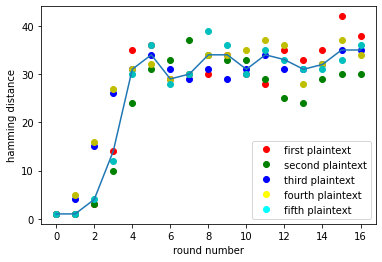

In [8]:
# points indicate hamming distances for each rounds and the line indicates the median values
plt.ylabel('hamming distance')
plt.xlabel('round number')
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=6, label='first plaintext')
green_dot = mlines.Line2D([], [], color='green', marker='o', linestyle='None',
                          markersize=6, label='second plaintext')
blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=6, label='third plaintext')
yellow_dot = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None',
                          markersize=6, label='fourth plaintext')
cyan_dot = mlines.Line2D([], [], color='cyan', marker='o', linestyle='None',
                          markersize=6, label='fifth plaintext')
col = ['ro', 'go', 'bo', 'yo', 'co']
for i in range(5):
    plt.plot(list(range(17)), hamming_distances[i], col[i])
plt.legend(handles = [red_dot, green_dot, blue_dot, yellow_dot, cyan_dot])

plt.plot(list(range(17)), medians)

plt.show()

<b>(ii) Avalanche effect using 5 different plaintexts with different hamming distances from the original plaintext</b>

In [9]:
# generating 5 random hamming distances
random.seed(7)
random_hamming_distances = sorted(random.sample(range(1, 65), 5))
print(random_hamming_distances)

[7, 10, 20, 42, 51]


In [10]:
# generating 5 different plaintexts with a different hamming distance from the original plaintext as defined by the random_hamming_distances array
plaintext_list2 = []
intermediate_values2 = []
random.seed(7)
for hd in random_hamming_distances:
    idxs = random.sample(range(0, 64), hd)
    plaintext_copy = string_to_bit_array_as_it_is(text)
    for idx in idxs:
        plaintext_copy[idx] = 1 - plaintext_copy[idx]
    plaintext_list2.append(bit_array_to_hex_string(plaintext_copy))

print(plaintext_list2)

['1a068a8eece86429', '364a8bde68a86400', '1f458a9ef02809e1', '3d9ab13b10312ff7', 'ef3ce5613357b7df']


In [11]:
d.clear()
r = d.encrypt(key, text)
intermediate_values2.append(d.round_results)

In [12]:
for i in range(5):
    d.clear()
    res = d.encrypt(key, plaintext_list2[i])
    intermediate_values2.append(d.round_results)

In [13]:
# creating the list of hamming distance per-round for each of the 5 generated plaintexts
hamming_distances2 = []
for i in range(1, 6):
    tmp = []
    for r in range(17):
        tmp.append(hamming_distance(string_to_bit_array_as_it_is(intermediate_values2[0][r]), string_to_bit_array_as_it_is(intermediate_values2[i][r])))
    hamming_distances2.append(tmp)

medians2 = [] # stores the medians of all the 5 strings for each of the rounds of the DES algorithm
for i in range(17):
    medians2.append(statistics.median([hamming_distances2[j][i] for j in range(5)]))
    
print(medians2)
for i in range(5):
    print(hamming_distances2[i])

[20, 25, 29, 26, 31, 36, 35, 34, 32, 28, 30, 37, 36, 33, 30, 34, 34]
[7, 10, 23, 36, 38, 29, 35, 40, 32, 27, 32, 37, 36, 36, 30, 30, 34]
[10, 12, 19, 26, 34, 37, 32, 29, 36, 35, 31, 31, 33, 36, 29, 24, 33]
[20, 25, 29, 23, 28, 37, 38, 34, 28, 25, 30, 37, 38, 33, 33, 35, 38]
[42, 33, 29, 26, 29, 36, 36, 34, 33, 28, 30, 44, 44, 28, 27, 35, 29]
[51, 43, 36, 34, 31, 34, 32, 27, 29, 29, 30, 32, 31, 33, 35, 34, 35]


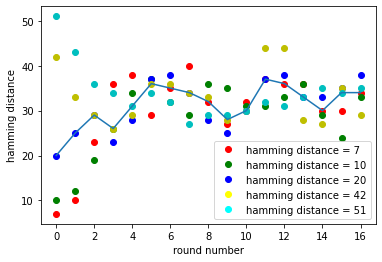

In [14]:
plt.ylabel('hamming distance')
plt.xlabel('round number')
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=6, label='hamming distance = 7')
green_dot = mlines.Line2D([], [], color='green', marker='o', linestyle='None',
                          markersize=6, label='hamming distance = 10')
blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=6, label='hamming distance = 20')
yellow_dot = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None',
                          markersize=6, label='hamming distance = 42')
cyan_dot = mlines.Line2D([], [], color='cyan', marker='o', linestyle='None',
                          markersize=6, label='hamming distance = 51')
for i in range(5):
    plt.plot(list(range(17)), hamming_distances2[i], col[i])
plt.legend(handles = [red_dot, green_dot, blue_dot, yellow_dot, cyan_dot])

plt.plot(list(range(17)), medians2)

plt.show()

<b>(iii) Avalanche effect using 5 different keys with a hamming distace of 1 from the original key keeping the plaintext same</b>

In [15]:
# First generate 5 random keys from the original key by inverting 1 bit at random
random.seed(10)
rand_idx = random.sample(range(0, 64), 5)

keys_list = []
for idx in rand_idx:
    key_copy = string_to_bit_array_as_it_is(key)
    key_copy[idx] = 1 - key_copy[idx]
    keys_list.append(bit_array_to_hex_string(key_copy))

print(keys_list)

['071571c947d9e859', '0f1571c947d9ea59', '0f1571c947d9e85d', '4f1571c947d9e859', '0f1571e947d9e859']


In [16]:
# A check to ensure that all the generated strings have a hamming distance of 1 from the original key
for k in keys_list:
    assert hamming_distance(string_to_bit_array_as_it_is(key), string_to_bit_array_as_it_is(k)) == 1

In [17]:
d.clear()
r = d.encrypt(key, text)

intermediate_values3 = []
intermediate_values3.append(d.round_results)

In [18]:
for i in range(5):
    d.clear()
    res = d.encrypt(keys_list[i], text)
    intermediate_values3.append(d.round_results)

In [19]:
# creating the list of hamming distance per-round for each of the 5 generated plaintexts
hamming_distances3 = []
for i in range(1, 6):
    tmp = []
    for r in range(17):
        tmp.append(hamming_distance(string_to_bit_array_as_it_is(intermediate_values3[0][r]), string_to_bit_array_as_it_is(intermediate_values3[i][r])))
    hamming_distances3.append(tmp)

# generating the medians 
medians3 = []
for i in range(17):
    medians3.append(statistics.median([hamming_distances3[j][i] for j in range(5)]))

print(medians3)
for i in range(5):
    print(hamming_distances3[i])

[0, 2, 12, 24, 29, 33, 36, 37, 32, 29, 31, 34, 35, 31, 32, 30, 32]
[0, 2, 14, 27, 29, 27, 31, 37, 39, 33, 31, 36, 35, 26, 32, 41, 36]
[0, 2, 6, 15, 25, 33, 36, 34, 31, 27, 26, 32, 35, 32, 33, 29, 30]
[0, 3, 11, 22, 32, 34, 32, 30, 32, 36, 37, 34, 32, 33, 32, 30, 32]
[0, 3, 12, 24, 27, 30, 38, 38, 32, 29, 35, 36, 35, 31, 27, 30, 32]
[0, 2, 13, 27, 34, 34, 37, 37, 31, 29, 29, 29, 27, 29, 34, 40, 38]


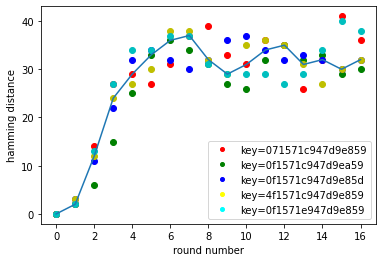

In [20]:
plt.ylabel('hamming distance')
plt.xlabel('round number')
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=4, label='key=071571c947d9e859')
green_dot = mlines.Line2D([], [], color='green', marker='o', linestyle='None',
                          markersize=4, label='key=0f1571c947d9ea59')
blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=4, label='key=0f1571c947d9e85d')
yellow_dot = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None',
                          markersize=4, label='key=4f1571c947d9e859')
cyan_dot = mlines.Line2D([], [], color='cyan', marker='o', linestyle='None',
                          markersize=4, label='key=0f1571e947d9e859')
col = ['ro', 'go', 'bo', 'yo', 'co']
for i in range(5):
    plt.plot(list(range(17)), hamming_distances3[i], col[i])
plt.legend(handles = [red_dot, green_dot, blue_dot, yellow_dot, cyan_dot])

plt.plot(list(range(17)), medians3)

plt.show()